In [1]:
# 1. 큰그림 보기
# 2. 데이터 수집
import pandas as pd
import numpy as np
import urllib.request
from pathlib import Path
import tarfile
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
import seaborn as sns
import warnings

def load_diabetes_data():
    csv_path = Path("datasets/diabetes.csv")
    if not csv_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
        urllib.request.urlretrieve(url, csv_path)
    return pd.read_csv(csv_path)

df = load_diabetes_data()

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# 데이터 기본 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
# 데이터 통계 정보
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# (1: 당뇨 발병 = 268명)
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

C:\Users\hyoun\AppData\Local\Temp\ipykernel_9776\3405689724.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Pregnancies'], ax=ax[0,0])
C:\Users\hyoun\AppData\Local\Temp\ipykernel_9776\3405689724.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Glucose'], ax=ax[0,1])
C:\Users\hyoun

<Axes: xlabel='Age', ylabel='Density'>

C:\Users\hyoun\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\hyoun\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


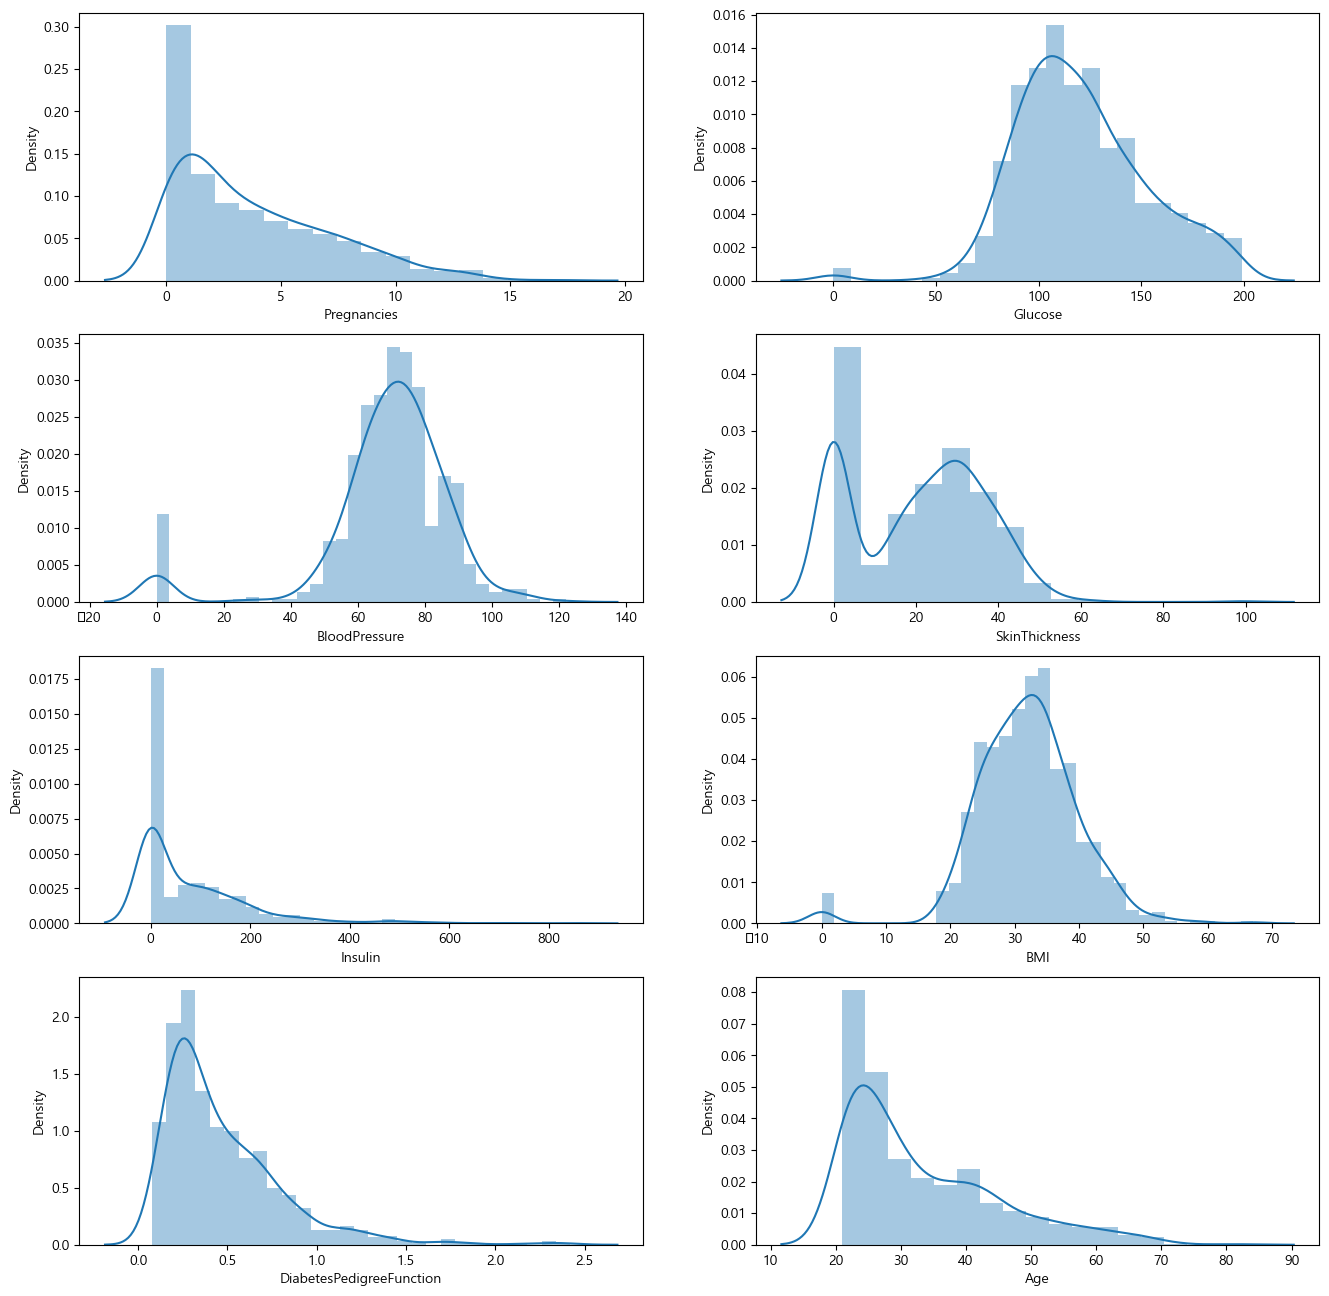

In [5]:
# 데이터 구조 확인

fig, ax = plt.subplots(4, 2, figsize=(16, 16))
sns.distplot(df['Pregnancies'], ax=ax[0,0])
sns.distplot(df['Glucose'], ax=ax[0,1])
sns.distplot(df['BloodPressure'], ax=ax[1,0])
sns.distplot(df['SkinThickness'], ax=ax[1,1])
sns.distplot(df['Insulin'], ax=ax[2,0])
sns.distplot(df['BMI'], ax=ax[2,1])
sns.distplot(df['DiabetesPedigreeFunction'], ax=ax[3,0])
sns.distplot(df['Age'], ax=ax[3,1])

In [6]:
# 테스트 세트 만들기
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df.Outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614,) (154,)


In [7]:
# 임신횟수에 따른 당뇨병의 발병 예측
print(df[['Pregnancies','Outcome']].groupby(['Pregnancies'],as_index=False).mean().sort_values(by='Pregnancies',ascending=True))

    Pregnancies   Outcome
0             0  0.342342
1             1  0.214815
2             2  0.184466
3             3  0.360000
4             4  0.338235
5             5  0.368421
6             6  0.320000
7             7  0.555556
8             8  0.578947
9             9  0.642857
10           10  0.416667
11           11  0.636364
12           12  0.444444
13           13  0.500000
14           14  1.000000
15           15  1.000000
16           17  1.000000


<Axes: xlabel='Outcome', ylabel='Pregnancies'>

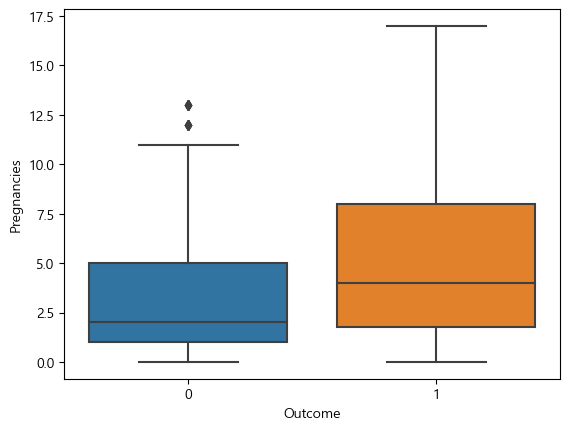

In [8]:
#3. 데이터 이해를 위한 탐색과 시각화  (박스플롯)
sns.boxplot(x="Outcome", y="Pregnancies", data=df)

<Axes: xlabel='Age', ylabel='Outcome'>

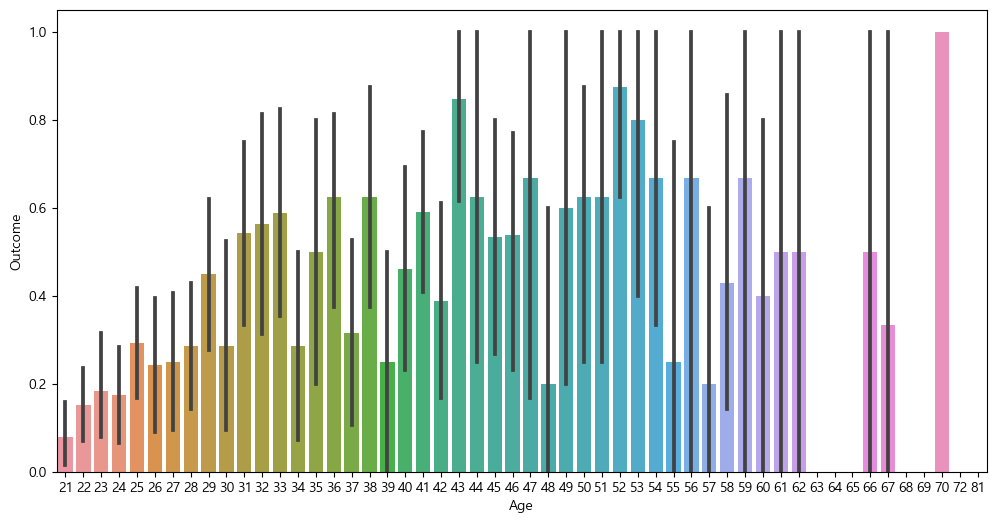

In [9]:
# 나이대 별 당뇨병 여부 (바 플롯)

plt.figure(figsize=(12,6))
sns.barplot(x="Age", y="Outcome", data=df)

In [10]:
# 데이터프레임의 열 간 상관관계 조사

from pandas.plotting import scatter_matrix
corr_matrix = df.corr()

corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


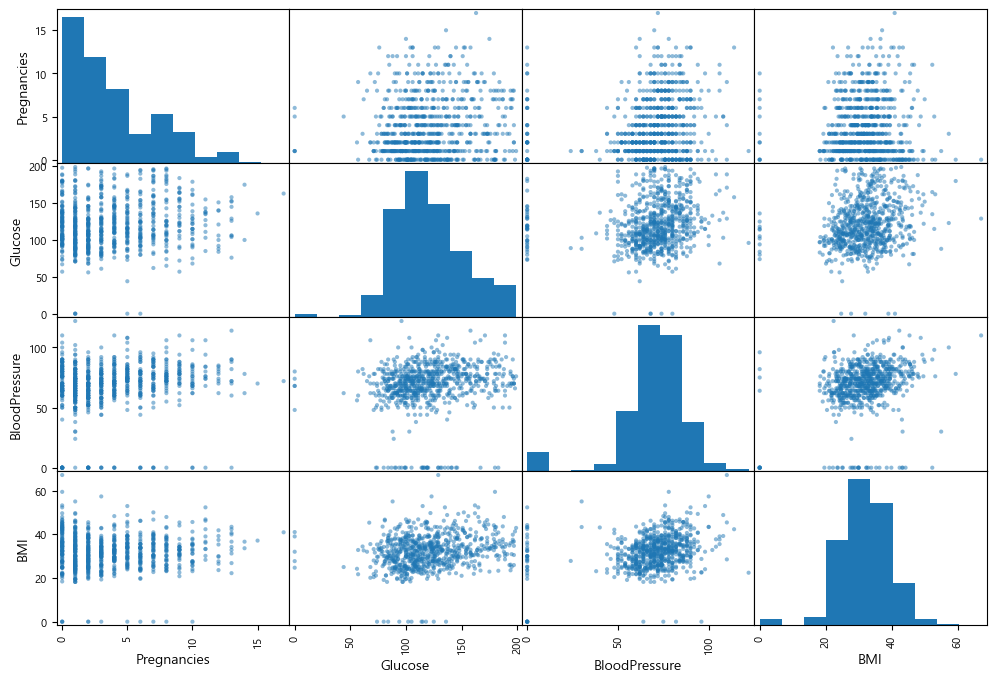

In [11]:
# 산점도, Heatmap를 이용한 상관관계 조사

attributes = ["Pregnancies", "Glucose", "BloodPressure", "BMI"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

<Axes: >

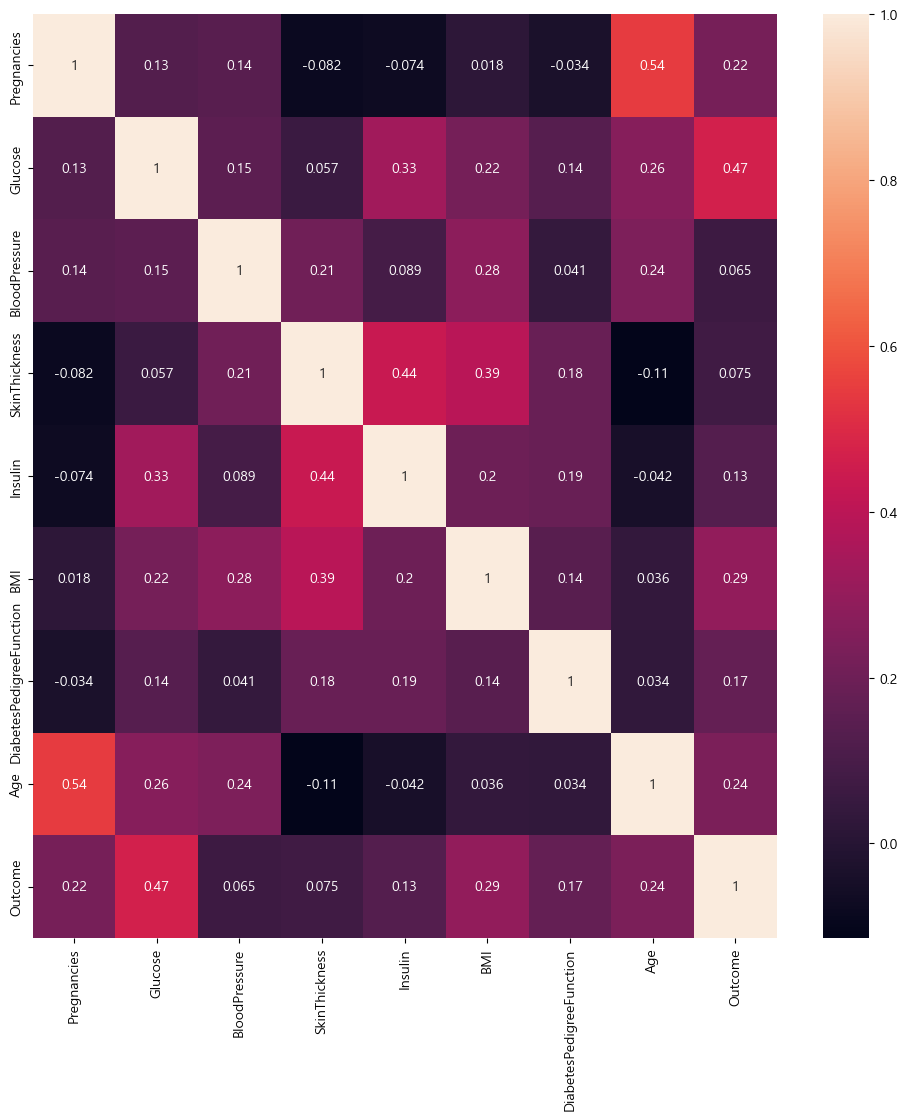

In [12]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

In [13]:
#4. 데이터 정제 (임신을 제외한 나머지 데이터의 결측치 처리)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 60 to 102
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   614 non-null    int64  
 2   BloodPressure             614 non-null    int64  
 3   SkinThickness             614 non-null    int64  
 4   Insulin                   614 non-null    int64  
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 43.2 KB


In [14]:
# 데이터가 0인 값 확인
X_train['Glucose'].replace(0, np.NaN, inplace=True)
X_train['BloodPressure'].replace(0, np.NaN, inplace=True)
X_train['SkinThickness'].replace(0, np.NaN, inplace=True)
X_train['Insulin'].replace(0, np.NaN, inplace=True)
X_train['BMI'].replace(0, np.NaN, inplace=True)
X_train['DiabetesPedigreeFunction'].replace(0, np.NaN, inplace=True)

X_train.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                24
SkinThickness               176
Insulin                     290
BMI                           7
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [15]:
# SimpleImputer 이용하여 각 열에 대해 결측치를 평균값으로 대체

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']
X_train[cols_with_missing] = imputer.fit_transform(X_train[cols_with_missing])

X_train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [16]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.742671,121.847291,72.238983,28.595890,154.330247,32.352224,0.469168,32.907166
std,3.313264,30.102023,12.099189,8.409917,86.975027,6.935517,0.336847,11.503437
min,0.000000,44.000000,24.000000,8.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,100.000000,64.000000,24.000000,116.000000,27.325000,0.241500,24.000000
50%,3.000000,118.000000,72.000000,28.595890,154.330247,32.000000,0.372500,29.000000
75%,6.000000,139.000000,80.000000,32.000000,154.330247,36.375000,0.613750,40.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000


In [17]:
#5. 텍스트와 범주형 특성 (OrdinalEncoder)
#(데이터에 텍스트 데이터가 없기에 임의로 추가하여 인코딩 진행)
from sklearn.preprocessing import OrdinalEncoder

# 데이터에 "gender" 컬럼을 추가하고 여성으로 데이터 추가
X_train['Gender'] = '여성'
X_train.info()

encoder = OrdinalEncoder(categories=[['여성']])

# fit() 호출하여 범주형 변수 학습 후 인코딩
encoder.fit(X_train[['Gender']])
X_train_encoded = encoder.transform(X_train[['Gender']])

X_train['Gender'] = X_train_encoded.astype(int)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 60 to 102
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   614 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             614 non-null    float64
 4   Insulin                   614 non-null    float64
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
 8   Gender                    614 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 48.0+ KB


In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 60 to 102
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   614 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             614 non-null    float64
 4   Insulin                   614 non-null    float64
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
 8   Gender                    614 non-null    int32  
dtypes: float64(6), int32(1), int64(2)
memory usage: 45.6 KB


In [19]:
X_train.drop('Gender', axis=1, inplace=True)

In [20]:
#6. 특성 스케일링 및 변환

# 아웃라이어 처리 (Z-score 이용)
threshold = 3

for column in X_train.columns:
    mean = X_train[column].mean()
    std = X_train[column].std()
    
    z_scores = (X_train[column] - mean) / std
    
    column_outliers = X_train[abs(z_scores) > threshold][column]
    print(f'{column} num of outliers: {len(column_outliers)}')
    # 아웃라이어 발견된 열에 대해 평균으로 대체
    if len(column_outliers) > 0:
        X_train.loc[abs(z_scores) > threshold, column] = mean

# 아웃라이어 삭제
X_train.dropna(inplace=True)

Pregnancies num of outliers: 4
Glucose num of outliers: 0
BloodPressure num of outliers: 6
SkinThickness num of outliers: 2
Insulin num of outliers: 15
BMI num of outliers: 4
DiabetesPedigreeFunction num of outliers: 10
Age num of outliers: 6


In [21]:
# 특성 스케일링 (표준화)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train)

In [22]:
#7. 사용자 정의 변환기
#(각 열의 평균값을 계산하여 결측치를 채워주는 변환기 생성)

from sklearn.base import BaseEstimator, TransformerMixin

class FillMissingValues(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # 각 열의 평균값 계산
        col_means = X.mean()
        
        # 결측치를 평균값으로 채움
        X_filled = X.fillna(col_means)
        
        return X_filled

In [23]:
# 변환기 생성 및 사용
filler = FillMissingValues()
X_transformed = filler.transform(df)

In [24]:
#8. 변환 파이프라인
# 수치형 특성 전처리 Pipeline 클래스를 이용하여 생성
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

numeric_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']
numeric_transformer = Pipeline(steps=[
    ('imputer', FillMissingValues()),  # 결측치 대체
    ('scaler', scaler)  # 표준화
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# 전처리 후 RandomForestClassifier 모델 적용
RandomForestModel = RandomForestClassifier()

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestModel)])

In [25]:
#7. 모델 선택과 훈련 (데이터셋이 분류에 적합하여 분류 모델 선택)
# RandomForestClassifier

RandomForestModel.fit(X_train, y_train)
RandomForestModel.score(X_test, y_test)

0.6883116883116883

In [26]:
# XGBoost

from xgboost import XGBClassifier
XGBModel = XGBClassifier()
XGBModel.fit(X_train, y_train)

XGBModel.score(X_test, y_test)

0.7207792207792207

In [27]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression

LogisticRegressionModel = LogisticRegression()
LogisticRegressionModel.fit(X_train, y_train)

LogisticRegressionModel.score(X_test, y_test)

C:\Users\hyoun\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7532467532467533

In [28]:
#7. 모델 세부 튜닝_하이퍼파라미터 최적화 (Grid Search 이용)

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# 모델과 하이퍼파라미터 설정
models_params = [
    (RandomForestClassifier(), {"max_depth": [3, 4, 5, 6], "min_samples_split": [2, 3]}),
    (XGBClassifier(), {"max_depth": [3, 4, 5, 6], "eta": [0.1, 0.01, 0.001]}),
    (LogisticRegression(), {"penalty": ["l1", "l2", "elasticnet", "none"]})
]

# Grid Search 수행 및 결과 출력
for model, params in models_params:
    gs_clf = GridSearchCV(model, param_grid=params, cv=5, refit=True)
    gs_clf.fit(X_train, y_train)
    print(f"Best parameters for {model.__class__.__name__}: {gs_clf.best_params_}")
    print(f"Train accuracy: {gs_clf.best_score_}")
    print(f"Test accuracy: {gs_clf.score(X_test, y_test)}")

Best parameters for RandomForestClassifier: {'max_depth': 6, 'min_samples_split': 3}
Train accuracy: 0.7736505397840864
Test accuracy: 0.7467532467532467
Best parameters for XGBClassifier: {'eta': 0.1, 'max_depth': 6}
Train accuracy: 0.7703851792616286
Test accuracy: 0.7402597402597403


C:\Users\hyoun\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hyoun\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best parameters for LogisticRegression: {'penalty': 'l2'}
Train accuracy: 0.773610555777689
Test accuracy: 0.7532467532467533


C:\Users\hyoun\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hyoun\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\hyoun\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as s

In [29]:
# Random Search 이용

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 11)
}

# 수행 및 결과 출력
rs_clf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, n_iter=100, cv=5, verbose=1, n_jobs=-1)
rs_clf.fit(X_train, y_train)

print(f"Best parameters: {rs_clf.best_params_}")

train_accuracy = rs_clf.best_score_
test_accuracy = rs_clf.score(X_test, y_test)

print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'max_depth': 5, 'min_samples_split': 2}
Train accuracy: 0.7769292283086766
Test accuracy: 0.7662337662337663
